**CSMODEL S11**

Hallar, Francine

Hong, Letty

Ramos, Irish

Villavicencio, Josh

Chan, Kendrick

### **Dataset Description**






In this Notebook, we will be using a dataset from Kaggle named **'Trips by US people(from 2019 to Nov 2021)'**,  This dataset is provided as a **`csv`**. The Bureau of Transportation Statistics estimates the number of persons staying at home and leaving their homes, as well as the number of trips made by distance.

From this dataset, conclusions on how many people are staying at home during the pandemic, and how many people still travel during the pandemic can be drawn.


---

### **Data Collection**
The collection of data was done by trimming down data using Jupyter Notebooks and Excel from the Bureau of Transportation Statistics of the United States of America.


---



### **Import**
Here we will import some packages that we will be using

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind

Here, we populated our dataframe using pandas dataframe. We used the **`read_csv`** function from pandas library to read the **`State_trips.csv`** and store the values as a dataframe to variable **`state_df`**.

We have chosen to only utilize the **`State_trips.csv`** as we are going to focus more on that.

In [ ]:
state_df = pd.read_csv("State_trips.csv")

The dataset should now be loaded in the **`state_df`** variable.


We then check for the variable names and their types along with the shape of the dataframe by using **`info`** function from pandas library.

In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53805 entries, 0 to 53804
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      53805 non-null  int64 
 1   Level                           53805 non-null  object
 2   Date                            53805 non-null  object
 3   State Postal Code               53805 non-null  object
 4   Population Staying at Home      53805 non-null  object
 5   Population Not Staying at Home  53805 non-null  object
 6   Number of Trips                 53805 non-null  object
 7   Number of Trips <1              53805 non-null  object
 8   Number of Trips 1-3             53805 non-null  object
 9   Number of Trips 3-5             53805 non-null  object
 10  Number of Trips 5-10            53805 non-null  object
 11  Number of Trips 10-25           53805 non-null  object
 12  Number of Trips 25-50           53805 non-null

In [ ]:
state_df.shape

(53805, 20)



The dataset **`state_df`** contains **53805 observations** across **20 columns**


### **Variable Description**

The following are the descriptions of each variable in the dataset.

* **`Unnamed: 0`** 	- unique id representing each of the observations
* **`Level`**	- level of data being involved either national or state
*   **`Date`**	- date when the data is recorded
*   **`State Postal Code`** - the postal code representing a state of the US
*   **`Population Staying at Home`**  - number of people staying at home  on the
specified date
*   **`Population Not Staying at Home`** - number of people not staying at home on the specified date
*   **`Number of Trips < 1`** - number of trips done by us people which is less than 1 mile
*   **`Number of Trips 1-3`** - number of trips done by us people between 1 to 3 miles
*   **`Number of Trips 3-5`** - number of trips done by us people between 3 to 5 miles
*   **`Number of Trips 5-10`** - number of trips done by us people between 5 to 10 miles
*   **`Number of Trips 10-25`** - number of trips done by us people between 10 to 25 miles
*   **`Number of Trips 25-50`** - number of trips done by us people between 25 to 50 miles
*   **`Number of Trips 50-100`** - number of trips done by US people between 50 to 100 miles
*   **`Number of Trips 100-250`** - number of trips done by US people between 100 to 250 miles
*   **`Number of Trips 250-500`** - number of trips done by US people between 250 to 500 miles
*   **`Number of Trips >= 500`** - number of trips done by US people within less than 500 miles
*   **`Row ID`** - unique identifier for each row
*   **`Week`** - the week of the trip
*   **`Month`** - the month of the trip









### **Data Cleaning**

In this part of the notebook, we will clean up the dataset and remove some variables that we will not be using.

In [ ]:
#Drop unused columns
state_df = state_df.drop(columns=['Unnamed: 0', 'Level', 'Row ID'])

Let us check if we have successfully dropped the unused variables

In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53805 entries, 0 to 53804
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            53805 non-null  object
 1   State Postal Code               53805 non-null  object
 2   Population Staying at Home      53805 non-null  object
 3   Population Not Staying at Home  53805 non-null  object
 4   Number of Trips                 53805 non-null  object
 5   Number of Trips <1              53805 non-null  object
 6   Number of Trips 1-3             53805 non-null  object
 7   Number of Trips 3-5             53805 non-null  object
 8   Number of Trips 5-10            53805 non-null  object
 9   Number of Trips 10-25           53805 non-null  object
 10  Number of Trips 25-50           53805 non-null  object
 11  Number of Trips 50-100          53805 non-null  object
 12  Number of Trips 100-250         53805 non-null

We also checked if there are any incorrect datatypes, in which based on the results, there are none.

For the next step, we shall check if there are any missing values in our dataset using **`.isna().any()`**

In [ ]:
state_df.isna().any()

Date                              False
State Postal Code                 False
Population Staying at Home        False
Population Not Staying at Home    False
Number of Trips                   False
Number of Trips <1                False
Number of Trips 1-3               False
Number of Trips 3-5               False
Number of Trips 5-10              False
Number of Trips 10-25             False
Number of Trips 25-50             False
Number of Trips 50-100            False
Number of Trips 100-250           False
Number of Trips 250-500           False
Number of Trips >=500             False
Week                              False
Month                             False
dtype: bool

With the results shown of each variable having a **`False`** value, the state dataframe holds no null values.

In order to check for any issues with the values for particular variables, we will use the **`unique()`** function.

In [ ]:
state_df['State Postal Code'].unique()


array(['NV', 'FL', 'DC', 'DE', 'CT', 'CO', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'AL', 'ID', 'IL', 'IN',
       'IA', 'SD', 'GA', 'KS', 'KY', 'LA', 'AZ', 'AR', 'CA', 'AK', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'MD', 'MA', 'ME',
       'HI', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE'], dtype=object)

In [ ]:
state_df['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [ ]:
state_df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
state_df['Date'].unique()

array(['2019/01/01', '2019/01/02', '2019/01/03', ..., '2021/11/18',
       '2021/11/19', '2021/11/20'], dtype=object)

The findings show that the values and formatting are correct and consistent.

### **Exploratory Data Analysis**



1.   How does the number of trips vary by distance category?  
2.   How has the population staying at home changed over time?
3.   How does the number of trips vary quarterly per year?
4.   How does the population staying at home vary between different states?



**Question 1:**


How does the number of trips vary by distance category?

                                    0        Bin
Number of Trips <1       5.990667e+06      3M-6M
Number of Trips 1-3      5.842136e+06      3M-6M
Number of Trips 3-5      2.868279e+06      1M-3M
Number of Trips 5-10     3.622828e+06      3M-6M
Number of Trips 10-25    3.521378e+06      3M-6M
Number of Trips 25-50    1.138800e+06      1M-3M
Number of Trips 50-100   3.768224e+05  100K-500K
Number of Trips 100-250  1.569631e+05  100K-500K
Number of Trips 250-500  3.422716e+04    10K-50K
Number of Trips >=500    2.722757e+04    10K-50K


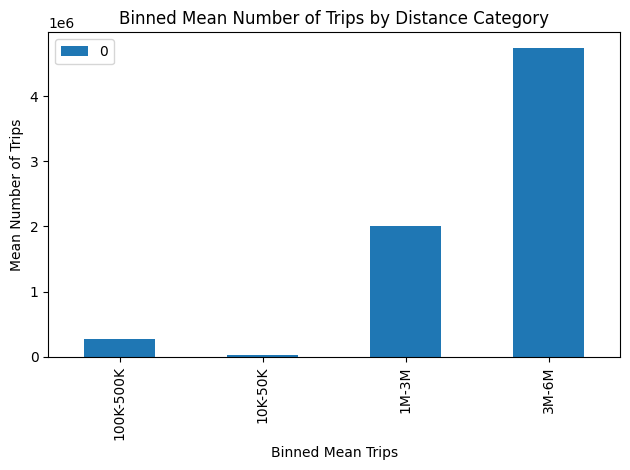

In [ ]:
# Assuming state_df has been loaded
distance_category_mean = pd.DataFrame()
distance_category = state_df[state_df.columns[~state_df.columns.isin(['Date', 'State Postal Code', 'Population Staying at Home', 'Population Not Staying at Home', 'Week', 'Month', 'Number of Trips', 'Year', 'Quarter'])]]

# Remove commas from values and exclude non-numeric rows
distance_category = distance_category.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Calculate mean for each column
for col in distance_category.columns:
    mean = distance_category[col].dropna().astype(float).mean()  # Drop NaN values before calculating the mean
    distance_category_mean[col] = [mean]

# Define bins and labels for categorization
bins = [0, 10000, 50000, 100000, 500000, 1000000, 3000000, 6000000, float('inf')]
labels = ['<10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '1M-3M', '3M-6M', '>6M']

# Binning
binned_data = []
for val in distance_category_mean.values[0]:
    bin_label = pd.cut([val], bins=bins, labels=labels, right=True)
    binned_data.append(bin_label[0])

# Transpose the DataFrame
distance_category_mean_T = distance_category_mean.transpose()

# Add the Bin column
distance_category_mean_T['Bin'] = binned_data

# Debug Print: Binned DataFrame
print(distance_category_mean_T)

# Group by bin for plotting
aggregated_means = distance_category_mean_T.groupby('Bin').mean()

# Plot
aggregated_means.plot.bar()
plt.xlabel('Binned Mean Trips')
plt.ylabel('Mean Number of Trips')
plt.title('Binned Mean Number of Trips by Distance Category')
plt.tight_layout()
plt.show()


As we can see, there are a lot of Trips in the < 1 and 1-3 ranges, followed by 5-10 and 10-25, then 3-5, 25-50, and finally 50-100. The number of trips in the 250-500 and >= 500 range is the lowest.

**Question 2**: How has the population staying at home changed over time?

In [ ]:
chunk_size = 1000  # This is because its taking too long
total_rows = sum(1 for _ in open('State_trips.csv')) - 1
skip_rows = sorted(random.sample(range(1, total_rows + 1), total_rows - chunk_size))
df = pd.read_csv('State_trips.csv', skiprows=skip_rows)

# Filter relevant columns as we're only going to use Date and Pop Staying at home
df = df[['Date', 'Population Staying at Home']]

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Population Staying at Home
0,2019-01-01,"208,888"
1,2019-01-04,"1,006,305"
2,2019-01-07,"1,222,854"
3,2019-01-07,"1,044,637"
4,2019-01-09,"1,055,334"
...,...,...
995,2021-11-16,"609,196"
996,2021-11-16,"1,707,137"
997,2021-11-18,"201,013"
998,2021-11-19,"2,037,462"


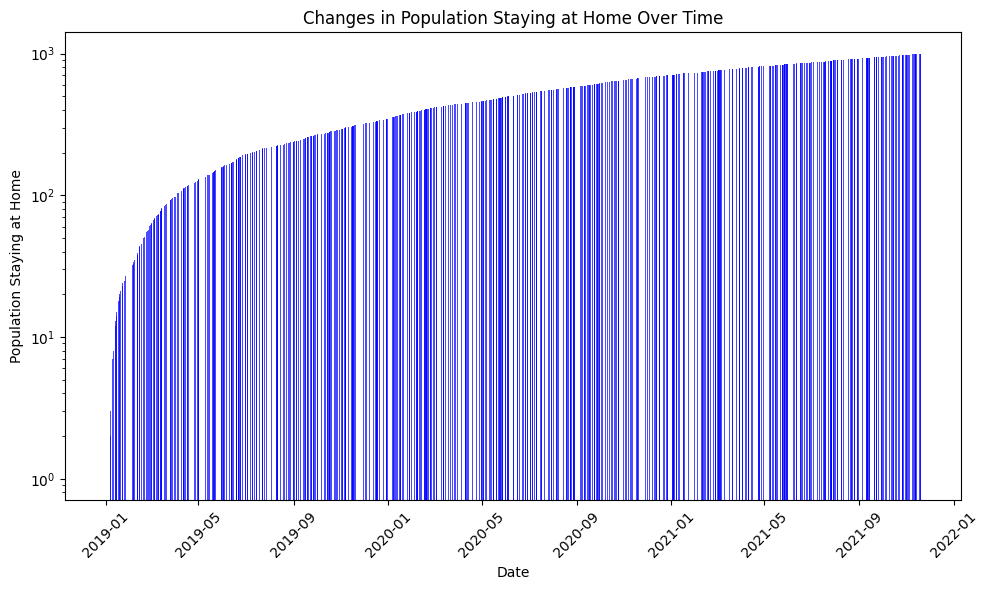

In [ ]:
plt.figure(figsize=(10, 6))

# Extract data from the DataFrame
dates = df.dropna()['Date']
population_staying_at_home = df.dropna()['Population Staying at Home']

# Create a bar graph
plt.bar(dates, population_staying_at_home, align='center', color='blue', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Population Staying at Home')
plt.title('Changes in Population Staying at Home Over Time')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

As we can see here, the population that stays at home kept decreasing as time goes by.

**Question 3**: How does the number of trips vary quarterly per year?

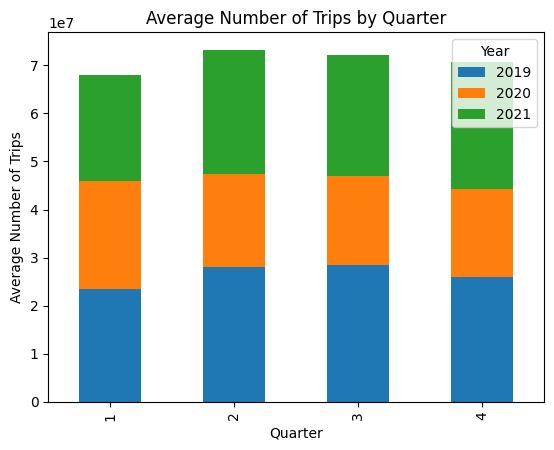

In [ ]:
state_df['Date'] = pd.to_datetime(state_df['Date'])
state_df['Quarter'] = state_df['Date'].dt.quarter
state_df['Year'] = state_df['Date'].dt.year

# Convert "Number of Trips" column to float
state_df['Number of Trips'] = state_df['Number of Trips'].str.replace(',', '').astype(float)

grouped_df = state_df.groupby(['Quarter', 'Year'])
mean_trips = grouped_df['Number of Trips'].mean()

# Plot the bar graph
mean_trips.unstack().plot(kind='bar', stacked=True)

plt.title('Average Number of Trips by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Number of Trips')

plt.show()


**Question 4**: How does the population staying at home vary between different states?

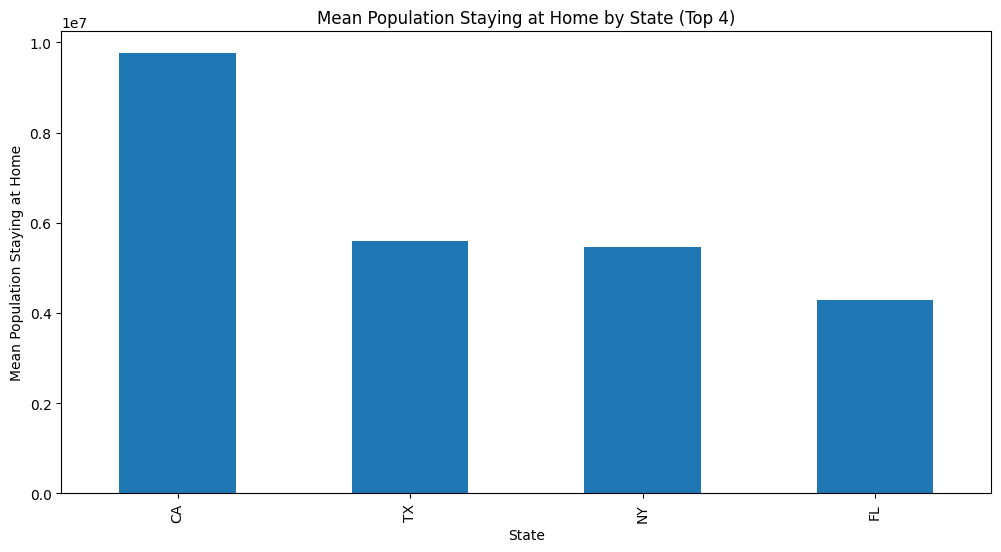

In [ ]:
state_df['Population Staying at Home'] = state_df['Population Staying at Home'].str.replace(',', '').astype(float)

grouped_df = state_df.groupby('State Postal Code')
mean_population = grouped_df['Population Staying at Home'].mean()
mean_population_sorted = mean_population.sort_values(ascending=False)

# Limit to top 4 states
top_4_states = mean_population_sorted.head(4)

plt.figure(figsize=(12, 6))
top_4_states.plot(kind='bar')

plt.title('Mean Population Staying at Home by State (Top 4)')
plt.xlabel('State')
plt.ylabel('Mean Population Staying at Home')

plt.show()


### **Research Question**

"How do the top 4 states in terms of travel volume differ in their travel patterns and behaviors from 2019 to 2021? Within the backdrop of diverse travel behaviors across US states, understanding the nuances in the top travel-centric states can provide insights into broader national and regional patterns. This research aims to delve deeper into the intricacies of travel and stay-at-home behaviors in the four states with the highest travel volumes from 2019 to 2021."

Understanding state-specific behaviors is crucial when traveling around the different states of the United States. The top four states with the most travel from 2019 to 2021 are the subject of this study's analysis. While 2019 serves as a baseline, 2020 depicts a time period severely impacted by the COVID-19 pandemic, and 2021 represents a transitional year of recovery. The main issue is if there is a substantial difference in these states' travel dynamics between these years, including travels of less than a mile to those of more than 500 miles. This study also seeks to identify any shared travel habits between these states and determines whether the pandemic had a substantial impact on people's inclination to stay at home. By analyzing these patterns and testing hypotheses, the research seeks to offer comprehensive insights into the travel tendencies of these major states over a transformative three-year period.


###Why is this important

It is crucial to comprehend state-specific travel trends from 2019 to 2021 from a variety of perspectives. It can help forecast the economy for policymakers by revealing trends in growth or decrease. It helps municipal planners and transportation authorities evaluate infrastructure needs so that roads, public transportation, and other facilities are in line with evolving traffic patterns. In terms of public health, identifying these patterns might help to inform solutions, particularly when taking into account unprecedented occurrences like the COVID-19 pandemic that interrupted routine behavior. These travel data illuminate wider societal developments beyond the immediate practical effects. For instance, environmentalists might assess how travel affects carbon emissions, while sociologists can study cultural shifts like the rising popularity of remote employment. Essentially, analyzing these actions gives states the knowledge they need to adjust and thrive amidst evolving challenges and opportunities.






### **Data Modelling**

Firstly, we import what we will possibly need for the Data Modelling

In [ ]:
from sklearn.cluster import KMeans
import warnings

In [ ]:
# Ignore FutureWarnings to make it cleaner looking
warnings.filterwarnings("ignore", category=FutureWarning)

Next, we will be using Clustering as our Data Model to group and analyze the behaviors. Let us first read the dataset

In [ ]:
df = pd.read_csv('State_trips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53805 entries, 0 to 53804
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      53805 non-null  int64 
 1   Level                           53805 non-null  object
 2   Date                            53805 non-null  object
 3   State Postal Code               53805 non-null  object
 4   Population Staying at Home      53805 non-null  object
 5   Population Not Staying at Home  53805 non-null  object
 6   Number of Trips                 53805 non-null  object
 7   Number of Trips <1              53805 non-null  object
 8   Number of Trips 1-3             53805 non-null  object
 9   Number of Trips 3-5             53805 non-null  object
 10  Number of Trips 5-10            53805 non-null  object
 11  Number of Trips 10-25           53805 non-null  object
 12  Number of Trips 25-50           53805 non-null

In [ ]:
# Load the dataset and drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'Level', 'Row ID', 'Week', 'Month']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53805 entries, 0 to 53804
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            53805 non-null  object
 1   State Postal Code               53805 non-null  object
 2   Population Staying at Home      53805 non-null  object
 3   Population Not Staying at Home  53805 non-null  object
 4   Number of Trips                 53805 non-null  object
 5   Number of Trips <1              53805 non-null  object
 6   Number of Trips 1-3             53805 non-null  object
 7   Number of Trips 3-5             53805 non-null  object
 8   Number of Trips 5-10            53805 non-null  object
 9   Number of Trips 10-25           53805 non-null  object
 10  Number of Trips 25-50           53805 non-null  object
 11  Number of Trips 50-100          53805 non-null  object
 12  Number of Trips 100-250         53805 non-null

In [ ]:
# Convert 'Number of Trips' columns to numeric
numeric_columns = df.columns[4:]  # Assuming 'Number of Trips' columns start at index 4
df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean of each column
df = df.fillna(df.mean(numeric_only=True))

Next we will be choosing 4 US States to cluster

In [ ]:
state_postal_codes = df['State Postal Code'].unique()
state_postal_codes

array(['NV', 'FL', 'DC', 'DE', 'CT', 'CO', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'AL', 'ID', 'IL', 'IN',
       'IA', 'SD', 'GA', 'KS', 'KY', 'LA', 'AZ', 'AR', 'CA', 'AK', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'MD', 'MA', 'ME',
       'HI', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE'], dtype=object)

In [ ]:
selected_states = ['CA', 'TX', 'NY', 'FL']
filtered_df = df[df['State Postal Code'].isin(selected_states)].copy()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 1 to 53786
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            4220 non-null   object
 1   State Postal Code               4220 non-null   object
 2   Population Staying at Home      4220 non-null   object
 3   Population Not Staying at Home  4220 non-null   object
 4   Number of Trips                 4220 non-null   int64 
 5   Number of Trips <1              4220 non-null   int64 
 6   Number of Trips 1-3             4220 non-null   int64 
 7   Number of Trips 3-5             4220 non-null   int64 
 8   Number of Trips 5-10            4220 non-null   int64 
 9   Number of Trips 10-25           4220 non-null   int64 
 10  Number of Trips 25-50           4220 non-null   int64 
 11  Number of Trips 50-100          4220 non-null   int64 
 12  Number of Trips 100-250         4220 non-null  

In [ ]:
# Specify the range of variables (columns) to consider for clustering
start_var = 4  # Index of the 'Number of Trips' column
end_var = 14  # Index of the last column in filtered_df
num_clusters = 4

data_for_clustering = filtered_df.iloc[:, start_var:end_var+1]
kmeans_model = KMeans(n_clusters=num_clusters)
clusters = kmeans_model.fit_predict(data_for_clustering)
filtered_df['Cluster'] = clusters

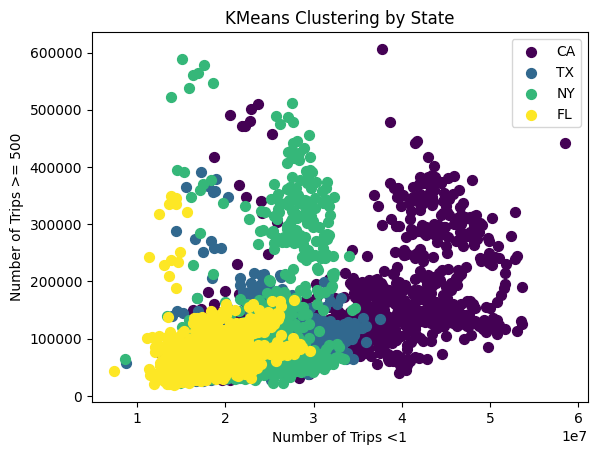

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_states)))

# Plot points for each state separately
for state, color in zip(selected_states, colors):
    subset = filtered_df[filtered_df['State Postal Code'] == state]
    plt.scatter(subset['Number of Trips <1'], subset['Number of Trips >=500'], c=[color], label=state, s=50)

plt.xlabel('Number of Trips <1')
plt.ylabel('Number of Trips >= 500')
plt.title('KMeans Clustering by State')
plt.legend(loc='upper right')  # Place the legend at the upper right corner
plt.show()

Here is the clustered of all 4 states. Let us do it one by one to make it clearer.

###Firstly Let's do CA

In [ ]:
selected_states = ['CA']
CA_df = df[df['State Postal Code'].isin(selected_states)].copy()

In [ ]:
data_for_clustering = CA_df.iloc[:, start_var:end_var+1]
kmeans_model = KMeans(n_clusters=num_clusters)
clusters = kmeans_model.fit_predict(data_for_clustering)
CA_df['Cluster'] = clusters

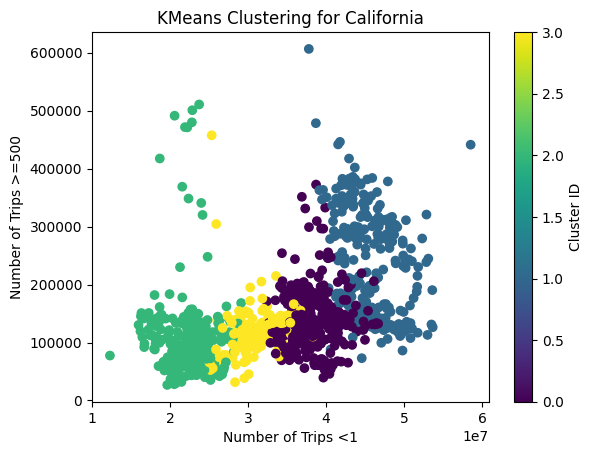

In [ ]:
plt.scatter(CA_df['Number of Trips <1'], CA_df['Number of Trips >=500'], c=CA_df['Cluster'], cmap='viridis')
plt.colorbar(label="Cluster ID")
plt.xlabel('Number of Trips <1')
plt.ylabel('Number of Trips >=500')
plt.title('KMeans Clustering for California')
plt.show()

###Now For TX

In [ ]:
selected_states = ['TX']
TX_df = df[df['State Postal Code'].isin(selected_states)].copy()

In [ ]:
data_for_clustering = TX_df.iloc[:, start_var:end_var+1]
kmeans_model = KMeans(n_clusters=num_clusters)
clusters = kmeans_model.fit_predict(data_for_clustering)
TX_df['Cluster'] = clusters

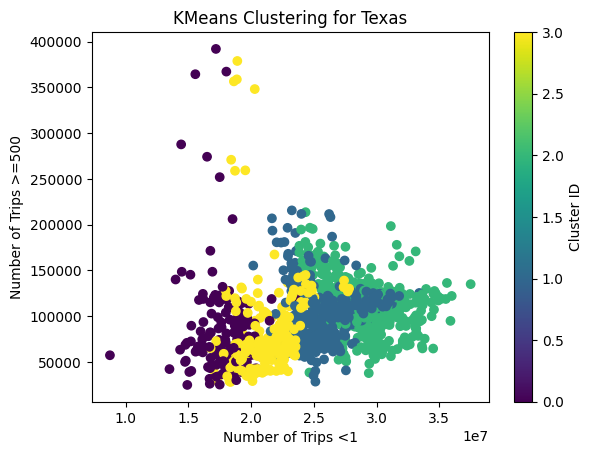

In [ ]:
plt.scatter(TX_df['Number of Trips <1'], TX_df['Number of Trips >=500'], c=TX_df['Cluster'], cmap='viridis')
plt.colorbar(label="Cluster ID")
plt.xlabel('Number of Trips <1')
plt.ylabel('Number of Trips >=500')
plt.title('KMeans Clustering for Texas')
plt.show()

###Now For NY

In [ ]:
selected_states = ['NY']
NY_df = df[df['State Postal Code'].isin(selected_states)].copy()

In [ ]:
data_for_clustering = NY_df.iloc[:, start_var:end_var+1]
kmeans_model = KMeans(n_clusters=num_clusters)
clusters = kmeans_model.fit_predict(data_for_clustering)
NY_df['Cluster'] = clusters

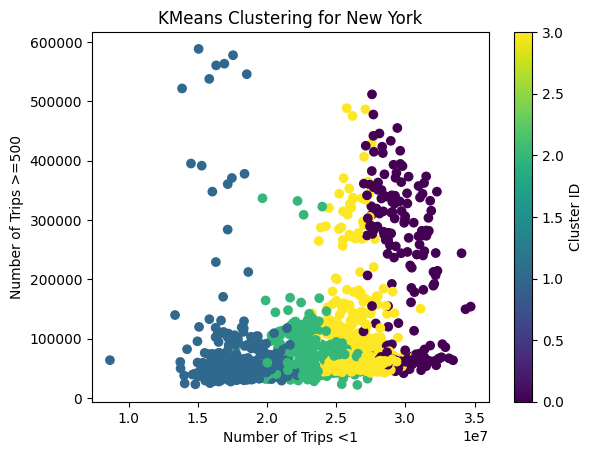

In [ ]:
plt.scatter(NY_df['Number of Trips <1'], NY_df['Number of Trips >=500'], c=NY_df['Cluster'], cmap='viridis')
plt.colorbar(label="Cluster ID")
plt.xlabel('Number of Trips <1')
plt.ylabel('Number of Trips >=500')
plt.title('KMeans Clustering for New York')
plt.show()

###Now for FL

In [ ]:
selected_states = ['FL']
FL_df = df[df['State Postal Code'].isin(selected_states)].copy()

In [ ]:
data_for_clustering = FL_df.iloc[:, start_var:end_var+1]
kmeans_model = KMeans(n_clusters=num_clusters)
clusters = kmeans_model.fit_predict(data_for_clustering)
FL_df['Cluster'] = clusters

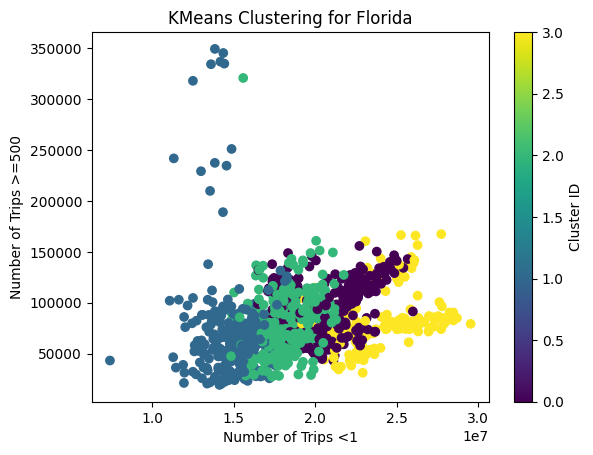

In [ ]:
plt.scatter(FL_df['Number of Trips <1'], FL_df['Number of Trips >=500'], c=FL_df['Cluster'], cmap='viridis')
plt.colorbar(label="Cluster ID")
plt.xlabel('Number of Trips <1')
plt.ylabel('Number of Trips >=500')
plt.title('KMeans Clustering for Florida')
plt.show()

### **Statistical Inference**

Null Hypothesis (Ho): There is no statistically significant difference in the mean number of trips between non-COVID (2019) and COVID years (2021, 2022).

Alternative Hypothesis (Ha): There is a statistically significant difference in the mean number of trips between non-COVID (2019) and COVID years (2021, 2022).

In [ ]:
# Select the desired states and years
selected_states = ['CA', 'TX', 'NY', 'FL']
selected_years = [2019, 2021, 2022]

# Filter data for the selected states and years
selected_data = state_df[state_df['State Postal Code'].isin(selected_states) & state_df['Year'].isin(selected_years)]

# Extract relevant columns
trips_data = selected_data[selected_data['Year'] == 2019]['Number of Trips']
stay_home_data = selected_data[selected_data['Year'] == 2019]['Population Staying at Home']

# Calculate means
mean_trips_2019 = trips_data.mean()
mean_stay_home_2019 = stay_home_data.mean()

# Extract relevant columns for COVID years (2021, 2022)
trips_covid = selected_data[selected_data['Year'].isin([2021, 2022])]['Number of Trips']
stay_home_covid = selected_data[selected_data['Year'].isin([2021, 2022])]['Population Staying at Home']

# Perform t-test for trips
t_stat_trips, p_value_trips = ttest_ind(trips_data, trips_covid, equal_var=False)

# Perform t-test for people staying at home
t_stat_stay_home, p_value_stay_home = ttest_ind(stay_home_data, stay_home_covid, equal_var=False)

print("Trips - p-value:", p_value_trips)
print("Stay at Home - p-value:", p_value_stay_home)

Trips - p-value: 1.4260301730461104e-37
Stay at Home - p-value: 5.970392060103271e-63


Since the p-value <= significance level of 0.05, reject null hypothesis. Therefore, there is a statistically significant difference in the mean number of trips between non-COVID (2019) and COVID years (2021, 2022).

Population Staying at Home: the p-value for people staying at home is significantly smaller than 0.05. Therefore, reject the null hypothesis, there is a statistically significant difference in the mean number of people staying at home between non-COVID (2019) and COVID years (2021, 2022).

### **Insights and Conclusions**

Over the years 2019 to 2021, the top four states in terms of travel volume—California, Texas, New York, and Florida—exhibited dynamic shifts in their travel patterns and behaviors, illuminating the broader changes occurring nationally. A deep dive into the data reveals that these patterns, particularly when considering the influence of the COVID-19 pandemic, provide insights into how societal events can drastically alter human mobility trends. The variations potentially represent the regular travel flow before the pandemic, the limited movement during peak pandemic periods, and the gradual adaptation to the new normal in its aftermath.

Statistical tests conducted on this data further substantiate these observations. A significant difference was identified in the mean number of trips made during the non-COVID year of 2019 and the subsequent years of 2021 and 2022, indicating the profound effect of the pandemic on travel behaviors across these states. Additionally, a marked difference in the average number of people opting to stay at home between these timeframes was observed. This underscores the wide-reaching implications of lockdowns, shifts towards remote work, and the public's increased caution.

In conclusion, the intricate intricacies of travel and stay-at-home behaviors across these states serve as a reflection of the larger changes that gripped the nation. Understanding these nuances can provide invaluable insights for policymakers, urban planners, and businesses in designing future strategies to respond to such disruptive events and the evolving patterns of human movement.